# Cluster Analysis and Model on Southern Literature

### Project Objectives
1. Classify text by features found in the texts.
2. Generate features through unsupervised learning.
3. Create a model to predict authorship of a piece of text based on its features.

### Literature Used
All pieces of literature were obtained from The Library of Southern Literature, which is part of the University of North Carolina's DocSouth initiative.  The library includes some of the most important and influential literature works from the American South.  The works are mainly from the late 19th Century and early 20th Century.  Newer works are likely omitted due to copyright laws.  The pieces used are as follows:
1. In the Tennessee Mountains (1885) by Charles Egbert Craddock (pseud. Murfree, Mary Noailles)
2. The Marrow of Tradition (1901) by Charles Waddell Chesnutt
3. The Awakening (1899) by Kate Chopin
4. Narrative of the Life of Frederick Douglass, an American Slave (1845) by Frederick Douglass
5. Uncle Remus, His Songs and His Sayings: The Folk-Lore of the Old Plantation (1881) by Joel Chandler Harris
6. Tiger-Lilies (1867) by Sidney Lanier
7. Odd Leaves from the Life of a Louisiana Swamp Doctor (1858) by Henry Clay Lewis
8. A Collection of Plays and Poems (1798) by Robert Munford
9. Tales (1845) by Edgar Allen Poe
10. Life on the Mississippi (1883) by Mark Twain

In [1]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import nltk
import re
from nltk.corpus import stopwords
from nltk.corpus import PlaintextCorpusReader
import spacy
import os
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.cluster import SpectralClustering
from sklearn.cluster import AffinityPropagation
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.metrics import adjusted_rand_score
from sklearn.metrics import silhouette_score
from sklearn import ensemble
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import MaxAbsScaler
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy import sparse

In [46]:
# Create corpus from files
corpus_root = r'southern-literature-texts'
southlit = PlaintextCorpusReader(corpus_root, '.*')

In [47]:
#adding work from first author in sentence form
craddock = southlit.sents('southlit-craddock-craddock.txt')
#processing
craddock_sents = []
for sentence in craddock:
    #removing the double-dash from all words
    sentence=[re.sub(r'-','',word) for word in sentence]
    #Forming each paragraph into a string and adding it to the list of strings.
    craddock_sents.append(' '.join(sentence))

In [48]:
chesnutt = southlit.sents('southlit-chesnuttmarrow-chesmarrow.txt')

chesnutt_sents = []
for sentence in chesnutt:
    #removing the double-dash from all words
    sentence=[re.sub(r'-','',word) for word in sentence]
    #Forming each paragraph into a string and adding it to the list of strings.
    chesnutt_sents.append(' '.join(sentence))

In [49]:
chopin = southlit.sents('southlit-chopinawake-chopin.txt')

chopin_sents = []
for sentence in chopin:
    #removing the double-dash from all words
    sentence=[re.sub(r'-','',word) for word in sentence]
    #Forming each paragraph into a string and adding it to the list of strings.
    chopin_sents.append(' '.join(sentence))

In [50]:
douglass = southlit.sents('neh-douglass-douglass.txt')

douglass_sents = []
for sentence in douglass:
    #removing the double-dash from all words
    sentence=[re.sub(r'-','',word) for word in sentence]
    #Forming each paragraph into a string and adding it to the list of strings.
    douglass_sents.append(' '.join(sentence))

In [51]:
harris = southlit.sents('southlit-harris-harris.txt')

harris_sents = []
for sentence in harris:
    #removing the double-dash from all words
    sentence=[re.sub(r'-','',word) for word in sentence]
    #Forming each paragraph into a string and adding it to the list of strings.
    harris_sents.append(' '.join(sentence))

In [52]:
lanier = southlit.sents('southlit-lanier-lanier.txt')

lanier_sents = []
for sentence in lanier:
    #removing the double-dash from all words
    sentence=[re.sub(r'-','',word) for word in sentence]
    #Forming each paragraph into a string and adding it to the list of strings.
    lanier_sents.append(' '.join(sentence))

In [53]:
lewis = southlit.sents('southlit-lewis-lewis.txt')

lewis_sents = []
for sentence in lewis:
    #removing the double-dash from all words
    sentence=[re.sub(r'-','',word) for word in sentence]
    #Forming each paragraph into a string and adding it to the list of strings.
    lewis_sents.append(' '.join(sentence))

In [54]:
munford = southlit.sents('southlit-munford-munford.txt')

munford_sents = []
for sentence in munford:
    #removing the double-dash from all words
    sentence=[re.sub(r'-','',word) for word in sentence]
    #Forming each paragraph into a string and adding it to the list of strings.
    munford_sents.append(' '.join(sentence))

In [55]:
poe = southlit.sents('southlit-poe-poe.txt')

poe_sents = []
for sentence in poe:
    #removing the double-dash from all words
    sentence=[re.sub(r'-','',word) for word in sentence]
    #Forming each paragraph into a string and adding it to the list of strings.
    poe_sents.append(' '.join(sentence))

In [56]:
twain = southlit.sents('southlit-twainlife-twain.txt')

twain_sents = []
for sentence in twain:
    #removing the double-dash from all words
    sentence=[re.sub(r'-','',word) for word in sentence]
    #Forming each paragraph into a string and adding it to the list of strings.
    twain_sents.append(' '.join(sentence))

#Checking for non-sentence data
print(twain_sents[0:2])

['[ Cover Image ] [ Spine Image ] THE " BATON ROUGE .', '"[ Frontispiece Image ] [ Title Page Image ] [ Title Page Verso Image ] THE “ BODY OF THE NATION .” BUT the basin of the Mississippi is the BODY OF THE NATION .']


In [57]:
# Group into sentences.
chesnutt_sents = [[sent, 'Chesnutt'] for sent in chesnutt_sents[2:]] #Leaving out title page information
chopin_sents = [[sent, 'Chopin'] for sent in chopin_sents[2:]]
craddock_sents = [[sent, 'Craddock'] for sent in craddock_sents[2:]]
douglass_sents = [[sent, 'Douglass'] for sent in douglass_sents[2:]]
harris_sents = [[sent, 'Harris'] for sent in harris_sents[2:]]
lanier_sents = [[sent, 'Lanier'] for sent in lanier_sents[2:]]
lewis_sents = [[sent, 'Lewis'] for sent in lewis_sents[2:]]
munford_sents = [[sent, 'Munford'] for sent in munford_sents[2:]]
poe_sents = [[sent, 'Poe'] for sent in poe_sents[2:]]
twain_sents = [[sent, 'Twain'] for sent in twain_sents[2:]]

# Combine the sentences from the two novels into one data frame.
sentences = pd.DataFrame(craddock_sents + douglass_sents + chesnutt_sents + chopin_sents + harris_sents + lanier_sents + lewis_sents + munford_sents + poe_sents + twain_sents)

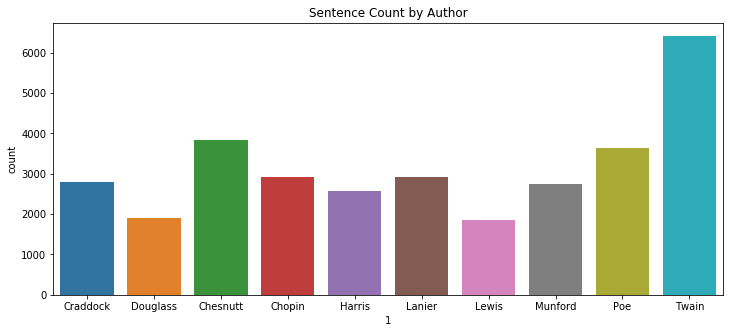

In [58]:
# Plot paragraph count by author
plt.figure(figsize=(12,5))
sns.countplot(x=1, data=sentences);
plt.title('Sentence Count by Author')

plt.show()

## Sentence Count by Work
As shown above, the number of sentences varied significantly among the different works.  Models performed a few accuracy points higher in general by balancing the data.

In [13]:
# Regrouping to balance data
chesnutt_sents = [[sent, 'Chesnutt'] for sent in chesnutt_sents[2:1802]] #Leaving out title page information
chopin_sents = [[sent, 'Chopin'] for sent in chopin_sents[2:1802]]
craddock_sents = [[sent, 'Craddock'] for sent in craddock_sents[2:1802]]
douglass_sents = [[sent, 'Douglass'] for sent in douglass_sents[2:1802]]
harris_sents = [[sent, 'Harris'] for sent in harris_sents[2:1802]]
lanier_sents = [[sent, 'Lanier'] for sent in lanier_sents[2:1802]]
lewis_sents = [[sent, 'Lewis'] for sent in lewis_sents[2:1802]]
munford_sents = [[sent, 'Munford'] for sent in munford_sents[2:1802]]
poe_sents = [[sent, 'Poe'] for sent in poe_sents[2:1802]]
twain_sents = [[sent, 'Twain'] for sent in twain_sents[2:1802]]

# Combine the sentences from the two novels into one data frame.
sentences = pd.DataFrame(craddock_sents + douglass_sents + chesnutt_sents + chopin_sents + harris_sents + lanier_sents + lewis_sents + munford_sents + poe_sents + twain_sents)
sentences.head()

,0,1
0,HIGH above Lost Creek Valley towers a wilderne...,Craddock
1,So dense is this growth that it masks the moun...,Craddock
2,"Even when the Cumberland spurs , to the east ,...",Craddock
3,"Whether the skies are blue , or gray , the dar...",Craddock
4,It stands against the west like a barrier .,Craddock


# Converting Sentences to TF-IDF Vectors

In [14]:
from sklearn.feature_extraction.text import TfidfVectorizer

X_train, X_test = train_test_split(sentences, test_size=0.25)

vectorizer = TfidfVectorizer(max_df=0.5, # drop words that occur in more than half the paragraphs
                             min_df=3, # only use words that appear at least three times
                             stop_words='english', 
                             lowercase=True, #convert everything to lower case (since Alice in Wonderland has the HABIT of CAPITALIZING WORDS for EMPHASIS)
                             use_idf=True,#we definitely want to use inverse document frequencies in our weighting
                             norm=u'l2', #Applies a correction factor so that longer paragraphs and shorter paragraphs get treated equally
                             smooth_idf=True #Adds 1 to all document frequencies, as if an extra document existed that used every word once.  Prevents divide-by-zero errors
                            )


#Applying the vectorizer
sentences_tfidf=vectorizer.fit_transform(sentences[0])
print("Number of features: %d" % sentences_tfidf.get_shape()[1])

#splitting into training and test sets
X_train_tfidf, X_test_tfidf= train_test_split(sentences_tfidf, test_size=0.25)


#Reshapes the vectorizer output into something people can read
X_train_tfidf_csr = X_train_tfidf.tocsr()

#number of paragraphs
n = X_train_tfidf_csr.shape[0]
#A list of dictionaries, one per paragraph
tfidf_bypara = [{} for _ in range(0,n)]
#List of features
terms = vectorizer.get_feature_names()
#for each paragraph, lists the feature words and their tf-idf scores
for i, j in zip(*X_train_tfidf_csr.nonzero()):
    tfidf_bypara[i][terms[j]] = X_train_tfidf_csr[i, j]

#Keep in mind that the log base 2 of 1 is 0, so a tf-idf score of 0 indicates that the word was present once in that sentence.
print('Original sentence:', X_train[0])
print('Tf_idf vector:', tfidf_bypara[0])

Number of features: 9589
Original sentence: 11383                                      Poor old lady !
15742    But these intervals of tranquility are only at...
13425                                           SCENE IV .
12820    Wou ' dbe , for sartin , is a civil gentleman ...
8112     “ Did the Fox eat the bird all — all — up ?” a...
15245    God , with all the powers attributed to spirit...
3711     All nature seemed to rejoice in sympathy with ...
11455    why , you told me you ' d pulled a hundred .” ...
17503    The whole river is bristling with exigencies i...
5607     When it came her turn to read it , she did so ...
8155                                             Run yer !
14574    In youth , the tulip  tree , or Liriodendron T...
17360    Being finally satisfied , he gives the order ,...
17768    Imagine the benefits of so admirable a system ...
5525     When his cigar was smoked out he went to bed ,...
9477     Gretchen was half  dead with terror ; but Otti...
12542    “ N

In [15]:
y = sentences[1]

X_train, X_test, y_train, y_test = train_test_split(sentences_tfidf, y, test_size=0.25)

## K-Means Clustering

In [16]:
# Calulate predicted values
kmeans = KMeans(n_clusters=10, init='k-means++', n_init=20)
y_pred = kmeans.fit_predict(X_train)

display(pd.crosstab(y_train, y_pred))

print('\nAdjusted Rand Score: {:0.7}'.format(adjusted_rand_score(y_train, y_pred)))
print('Silhouette Score: {:0.7}'.format(silhouette_score(X_train, y_pred, metric='euclidean')))

col_0,0,1,2,3,4,5,6,7,8,9
1,,,,,,,,,,
Chesnutt,114,28,980,0,51,39,60,59,1,17
Chopin,57,65,1038,0,61,40,44,0,13,17
Craddock,63,36,867,0,32,0,45,300,0,17
Douglass,132,32,961,0,44,83,35,0,0,32
Harris,53,75,402,683,23,24,3,69,23,1
Lanier,92,29,1083,0,23,24,78,16,4,10
Lewis,116,19,1084,0,38,14,30,0,14,11
Munford,85,27,1100,0,13,105,2,3,13,3
Poe,77,34,1147,0,26,3,59,0,4,13



Adjusted Rand Score: 0.01971721
Silhouette Score: 0.01298743


## Spectral Clustering

In [17]:
n_clusters= 10
sc = SpectralClustering(n_clusters=n_clusters)
y_pred2 = sc.fit_predict(X_train)

display(pd.crosstab(y_train, y_pred2))

print('\nAdjusted Rand Score: {:0.7}'.format(adjusted_rand_score(y_train, y_pred2)))
print('Silhouette Score: {:0.7}'.format(silhouette_score(X_train, y_pred2, metric='euclidean')))

col_0,0,1,2,3,4,5,6,7,8,9
1,,,,,,,,,,
Chesnutt,1211,2,0,0,15,109,0,4,0,8
Chopin,1261,1,0,0,13,54,6,0,0,0
Craddock,987,0,0,0,1,372,0,0,0,0
Douglass,1262,2,0,0,8,33,0,14,0,0
Harris,475,0,17,19,15,89,10,4,235,492
Lanier,1254,4,0,0,13,84,2,2,0,0
Lewis,1270,6,0,0,2,34,12,2,0,0
Munford,1143,141,0,0,17,36,10,3,0,1
Poe,1302,1,0,0,6,53,1,0,0,0



Adjusted Rand Score: 0.01530923
Silhouette Score: 0.008539976


## Affinity Propagation

In [18]:
af = AffinityPropagation().fit(X_train)

y_pred3 = af.predict(X_train)

# Pull the number of clusters and cluster assignments for each data point.
cluster_centers_indices = af.cluster_centers_indices_
n_clusters_ = len(cluster_centers_indices)
labels = af.labels_

print('Estimated number of clusters: {}'.format(n_clusters_))
display(pd.crosstab(y_train, y_pred3))
print('\nAdjusted Rand Score: {:0.7}'.format(adjusted_rand_score(y_train, y_pred3)))
print('Silhouette Score: {:0.7}'.format(silhouette_score(X_train, y_pred3, metric='euclidean')))

Estimated number of clusters: 483


col_0,0,1,3,4,6,7,9,11,13,18,...,453,458,460,462,463,469,471,474,476,479
1,,,,,,,,,,,,,,,,,,,,,
Chesnutt,1259,0,1,0,1,0,0,0,0,1,...,1,0,2,0,0,0,0,0,0,0
Chopin,1196,1,0,0,0,0,0,1,0,0,...,2,0,1,0,0,0,2,0,2,1
Craddock,1316,3,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Douglass,1177,2,3,0,0,0,0,0,0,1,...,1,0,4,0,0,0,0,0,0,0
Harris,970,0,0,0,0,0,4,0,14,0,...,0,0,0,0,0,0,0,0,0,0
Lanier,1229,2,0,0,0,3,0,3,0,1,...,1,0,1,0,0,0,0,1,0,4
Lewis,1204,1,0,0,2,2,0,1,0,0,...,1,0,0,2,0,2,0,5,1,4
Munford,849,0,1,20,0,2,0,1,0,0,...,0,11,0,0,8,5,2,4,2,4
Poe,1221,1,0,0,3,1,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0



Adjusted Rand Score: 0.00295768
Silhouette Score: -0.01982516


## DBSCAN

In [19]:
# Compute DBSCAN
db = DBSCAN(eps=0.3, min_samples=10).fit(X_train)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)

print('Estimated number of clusters: %d' % n_clusters_)

display(pd.crosstab(y_train, labels))
print('\nAdjusted Rand Score: {:0.7}'.format(adjusted_rand_score(y_train, labels)))
print('Silhouette Score: {:0.7}'.format(silhouette_score(X_train, labels, metric='euclidean')))

Estimated number of clusters: 7


col_0,-1,0,1,2,3,4,5,6
1,,,,,,,,
Chesnutt,1340,5,0,0,0,0,0,4
Chopin,1322,9,0,0,4,0,0,0
Craddock,1351,9,0,0,0,0,0,0
Douglass,1297,9,0,0,0,0,0,13
Harris,1303,17,0,14,3,0,17,2
Lanier,1324,34,0,0,0,0,0,1
Lewis,1283,24,0,0,10,7,0,2
Munford,1281,45,12,0,7,5,0,1
Poe,1329,33,0,0,1,0,0,0



Adjusted Rand Score: 6.161303e-05
Silhouette Score: -0.2593034


# Clustering Performance
None of the clustering techniques performed very well.  K-Means clustering performed best, but only slightly better than assigning sentences randomly.

### Modifying Test/Training Sets to Match Number of Features

In [20]:
X_train_c = sparse.csr_matrix(y_pred3)

In [21]:
a = X_train.todense()
b = X_train_c.T.todense()
c = np.concatenate((a, b), axis=1)

In [22]:
X_train_comb = sparse.csr_matrix(c)

In [23]:
d = X_test.todense()
e = af.predict(X_test).reshape(-1, 1)
f = np.concatenate((d, e), axis=1)

In [24]:
g = kmeans.fit_predict(X_test).reshape(-1, 1)
h = np.concatenate((d, g), axis=1)
X_train_c2 = sparse.csr_matrix(y_pred)
j = X_train_c2.T.todense()
k = np.concatenate((a, j), axis=1)
X_train_comb2 = sparse.csr_matrix(k)

## Logistic Regression

In [25]:
lr = LogisticRegression()
lr.fit(X_train, y_train)

print('\n--Without Clustering--')
print('Training set score:', lr.score(X_train, y_train))
print('Test set score:', lr.score(X_test, y_test))

lrc = LogisticRegression()
lrc.fit(X_train_c.T, y_train)

print('\n--With Affinity Propagation--')
print('Training set score:', lrc.score(X_train_c.T, y_train))
print('Test set score:', lrc.score(e, y_test))

lrc2 = LogisticRegression()
lrc2.fit(X_train_c.T, y_train)

print('\n--With K-Means--')
print('Training set score:', lrc2.score(X_train_c2.T, y_train))
print('Test set score:', lrc2.score(g, y_test))

lrcomb = LogisticRegression()
lrcomb.fit(X_train_comb, y_train)

print('\n--Combining TF-IDF Vectors with Affinity Propagation--')
print('Training set score:', lrcomb.score(X_train_comb, y_train))
print('Test set score:', lrcomb.score(f, y_test))

lrcomb2 = LogisticRegression()
lrcomb2.fit(X_train_comb2, y_train)

print('\n--Combining TF-IDF Vectors with K-Means Clustering--')
print('Training set score:', lrcomb2.score(X_train_comb2, y_train))
print('Test set score:', lrcomb2.score(h, y_test))


--Without Clustering--
Training set score: 0.8694074074074074
Test set score: 0.6806666666666666

--With Affinity Propagation--
Training set score: 0.1317037037037037
Test set score: 0.12844444444444444

--With K-Means--
Training set score: 0.10074074074074074
Test set score: 0.09777777777777778

--Combining TF-IDF Vectors with Affinity Propagation--
Training set score: 0.8671851851851852
Test set score: 0.6808888888888889

--Combining TF-IDF Vectors with K-Means Clustering--
Training set score: 0.8688148148148148
Test set score: 0.6366666666666667


In [26]:
# Display crosstab results of predicted clusters vs actual authors
y_test_pred_lr = lr.predict(X_test)
print('\nCross-Tabulation of Linear Regression Model without Clustering')
display(pd.crosstab(y_test, y_test_pred_lr))


Cross-Tabulation of Linear Regression Model without Clustering


col_0,Chesnutt,Chopin,Craddock,Douglass,Harris,Lanier,Lewis,Munford,Poe,Twain
1,,,,,,,,,,
Chesnutt,299,21,11,12,8,8,20,25,32,15
Chopin,21,297,11,19,1,17,16,19,40,24
Craddock,7,13,327,12,1,10,13,9,36,12
Douglass,15,13,3,300,1,12,33,14,67,23
Harris,10,4,2,9,376,5,11,4,17,6
Lanier,7,23,26,12,1,246,28,23,45,30
Lewis,18,17,7,12,1,10,311,22,50,26
Munford,6,11,5,22,1,17,17,325,30,15
Poe,7,19,12,16,2,22,22,14,303,20


In [27]:
# Display crosstab results of predicted clusters vs actual authors
y_test_pred_lrc = lrcomb.predict(f)
print('\nCross-Tabulation of Linear Regression Model including Affinity Propagation')
display(pd.crosstab(y_test, y_test_pred_lrc))


Cross-Tabulation of Linear Regression Model including Affinity Propagation


col_0,Chesnutt,Chopin,Craddock,Douglass,Harris,Lanier,Lewis,Munford,Poe,Twain
1,,,,,,,,,,
Chesnutt,297,19,13,12,9,8,20,24,33,16
Chopin,20,294,12,19,2,17,15,18,44,24
Craddock,7,13,327,14,1,10,11,10,36,11
Douglass,15,13,3,300,1,13,32,15,66,23
Harris,11,4,2,9,375,5,10,5,17,6
Lanier,7,19,25,13,1,250,28,22,46,30
Lewis,19,16,7,12,1,11,310,24,50,24
Munford,5,11,4,24,2,19,15,326,28,15
Poe,7,18,14,16,3,21,21,11,306,20


## Random Forest

In [28]:
rfc = ensemble.RandomForestClassifier()
rfc.fit(X_train, y_train)

print('Without Clustering as a Feature')
print('Training set score:', rfc.score(X_train, y_train))
print('Test set score:', rfc.score(X_test, y_test))

rfcc = ensemble.RandomForestClassifier()
rfcc.fit(X_train_c.T, y_train)

print('\nWith Affinity Propagation')
print('Training set score:', rfcc.score(X_train_c.T, y_train))
print('Test set score:', rfcc.score(e, y_test))

rfccomb = ensemble.RandomForestClassifier()
rfccomb.fit(X_train_comb, y_train)

print('\nCombining TF-IDF Vectors with Affinity Propagation')
print('Training set score:', rfccomb.score(X_train_comb, y_train))
print('Test set score:', rfccomb.score(f, y_test))

Without Clustering as a Feature
Training set score: 0.9703703703703703
Test set score: 0.5715555555555556

With Affinity Propagation
Training set score: 0.18755555555555556
Test set score: 0.158

Combining TF-IDF Vectors with Affinity Propagation
Training set score: 0.9711111111111111
Test set score: 0.5702222222222222


In [29]:
# Display crosstab results of predicted clusters vs actual authors# Display 
y_test_pred_rfc = rfccomb.predict(f)
print('\nCross-Tabulation of Random Forest Model including Affinity Propagation')
display(pd.crosstab(y_test, y_test_pred_rfc))


Cross-Tabulation of Random Forest Model including Affinity Propagation


col_0,Chesnutt,Chopin,Craddock,Douglass,Harris,Lanier,Lewis,Munford,Poe,Twain
1,,,,,,,,,,
Chesnutt,261,28,13,16,25,10,27,24,21,26
Chopin,25,247,19,27,5,23,23,27,30,39
Craddock,16,29,268,16,5,28,12,18,26,22
Douglass,26,29,22,253,4,24,28,23,36,36
Harris,8,2,7,6,381,2,4,10,7,17
Lanier,10,39,47,29,5,195,21,31,17,47
Lewis,29,21,31,27,5,23,210,36,39,53
Munford,7,24,11,19,4,24,19,284,21,36
Poe,18,36,24,23,3,30,24,23,212,44


## Gradient Boosting

In [30]:
clf = ensemble.GradientBoostingClassifier()
clf.fit(X_train, y_train)

print('\nWithout Clustering as a Feature')
print('Training set score:', clf.score(X_train, y_train))
print('Test set score:', clf.score(X_test, y_test))

clfc = ensemble.GradientBoostingClassifier()
clfc.fit(X_train_c.T, y_train)

print('\nWith Affinity Propagation')
print('Training set score:', clfc.score(X_train_c.T, y_train))
print('Test set score:', clfc.score(e, y_test))

clfcomb = ensemble.GradientBoostingClassifier()
clfcomb.fit(X_train_comb, y_train)

print('\nCombining TF-IDF Vectors with Affinity Propagation')
print('Training set score:', clfcomb.score(X_train_comb, y_train))
print('Test set score:', clfcomb.score(f, y_test))


Without Clustering as a Feature
Training set score: 0.6779259259259259
Test set score: 0.564

With Affinity Propagation
Training set score: 0.18222222222222223
Test set score: 0.1582222222222222

Combining TF-IDF Vectors with Affinity Propagation
Training set score: 0.6812592592592592
Test set score: 0.564


## Support Vector Machine

In [31]:
svm = SVC(C=50)
svm.fit(X_train, y_train)

print('\nWithout Clustering as a Feature')
print('Training set score:', svm.score(X_train, y_train))
print('Test set score:', svm.score(X_test, y_test))

svmc = SVC(C=50)
svmc.fit(X_train_c.T, y_train)

print('\nWith Affinity Propagation')
print('Training set score:', svmc.score(X_train_c.T, y_train))
print('Test set score:', svmc.score(e, y_test))

svmcomb = SVC(C=50)
svmcomb.fit(X_train_comb, y_train)

print('\nCombining TF-IDF Vectors with Affinity Propagation')
print('Training set score:', svmcomb.score(X_train_comb, y_train))
print('Test set score:', svmcomb.score(f, y_test))


Without Clustering as a Feature
Training set score: 0.1448888888888889
Test set score: 0.12777777777777777

With Affinity Propagation
Training set score: 0.18822222222222224
Test set score: 0.15977777777777777

Combining TF-IDF Vectors with Affinity Propagation
Training set score: 0.15214814814814814
Test set score: 0.13555555555555557


## K-Nearest Neighbors

In [32]:
knn = KNeighborsClassifier(n_neighbors=15)
knn.fit(X_train, y_train)

print('\nWithout Clustering as a Feature')
print('Training set score:', knn.score(X_train, y_train))
print('Test set score:', knn.score(X_test, y_test))

knnc = KNeighborsClassifier(n_neighbors=15)
knnc.fit(X_train_c.T, y_train)

print('\nWith Affinity Propagation')
print('Training set score:', knnc.score(X_train_c.T, y_train))
print('Test set score:', knnc.score(e, y_test))

knncomb = KNeighborsClassifier(n_neighbors=15)
knncomb.fit(X_train_comb, y_train)

print('\nCombining TF-IDF Vectors with Affinity Propagation')
print('Training set score:', knncomb.score(X_train_comb, y_train))
print('Test set score:', knncomb.score(f, y_test))


Without Clustering as a Feature
Training set score: 0.26192592592592595
Test set score: 0.16422222222222221

With Affinity Propagation
Training set score: 0.16637037037037036
Test set score: 0.1428888888888889

Combining TF-IDF Vectors with Affinity Propagation
Training set score: 0.24866666666666667
Test set score: 0.14355555555555555


## Naive Bayes

In [33]:
mnb = MultinomialNB(alpha=.04)
mnb.fit(X_train, y_train)

print('\nWithout Clustering as a Feature')
print('Training set score:', mnb.score(X_train, y_train))
print('Test set score:', mnb.score(X_test, y_test))

mnbc = MultinomialNB(alpha=.04)
mnbc.fit(X_train_c.T, y_train)

print('\nWith Affinity Propagation')
print('Training set score:', mnbc.score(X_train_c.T, y_train))
print('Test set score:', mnbc.score(e, y_test))

mnbcomb = MultinomialNB(alpha=.04)
mnbcomb.fit(X_train_comb, y_train)

print('\nCombining TF-IDF Vectors with Affinity Propagation')
print('Training set score:', mnbcomb.score(X_train_comb, y_train))
print('Test set score:', mnbcomb.score(f, y_test))


Without Clustering as a Feature
Training set score: 0.9074814814814814
Test set score: 0.7097777777777777

With Affinity Propagation
Training set score: 0.10237037037037038
Test set score: 0.09288888888888888

Combining TF-IDF Vectors with Affinity Propagation
Training set score: 0.7611851851851852
Test set score: 0.5455555555555556


## Multi-layer Perceptron Classifier

In [34]:
# different learning rate schedules and momentum parameters
params = [{'solver': 'sgd', 'learning_rate': 'constant', 'momentum': 0,
           'learning_rate_init': 0.1},
          {'solver': 'sgd', 'learning_rate': 'constant', 'momentum': .9,
           'learning_rate_init': 0.2},
          {'solver': 'sgd', 'learning_rate': 'constant', 'momentum': .9,
           'nesterovs_momentum': False, 'learning_rate_init': 0.2},
          {'solver': 'sgd', 'learning_rate': 'invscaling', 'momentum': 0,
           'learning_rate_init': 0.2},
          {'solver': 'lbfgs'},
          {'solver': 'lbfgs', 'alpha': 0.0002},
          {'solver': 'lbfgs', 'alpha': 0.00005},
          {'solver': 'adam', 'learning_rate_init': 0.01}]

labels = ["constant learning-rate: 0.1", "constant learning-rate: 0.2",
          "constant with momentum", "inv-scaling learning-rate",
          "lbfgs", "lbfgs alpha: 0.0002", "lbfgs alpha: 0.00005", "adam"]

X = MaxAbsScaler().fit_transform(X_train)
mlps = []
max_iter = 400

for label, param in zip(labels, params):
    print("---training: %s---" % label)
    mlp = MLPClassifier(verbose=0, random_state=0,
                            max_iter=max_iter, **param)
    mlp.fit(X, y_train)
    mlps.append(mlp)
    print("Test set score: %f" % mlp.score(X_test, y_test))
    print("Training set loss: %f" % mlp.loss_)

---training: constant learning-rate: 0.1---
Test set score: 0.647778
Training set loss: 0.087010
---training: constant learning-rate: 0.2---
Test set score: 0.629111
Training set loss: 0.087640
---training: constant with momentum---
Test set score: 0.638889
Training set loss: 0.097303
---training: inv-scaling learning-rate---
Test set score: 0.131333
Training set loss: 2.280912
---training: lbfgs---
Test set score: 0.641556
Training set loss: 0.057648
---training: lbfgs alpha: 0.0002---
Test set score: 0.615556
Training set loss: 0.057857
---training: lbfgs alpha: 0.00005---
Test set score: 0.630444
Training set loss: 0.057927
---training: adam---
Test set score: 0.641556
Training set loss: 0.075992


In [60]:
mlp = MLPClassifier(hidden_layer_sizes=(100,), solver='sgd', alpha=0.0001, learning_rate='constant',
                    learning_rate_init=0.02, momentum=0, max_iter=2000)
mlp.fit(X_train, y_train)

print('Training set score:', mlp.score(X_train, y_train))
print('Test set score:', mlp.score(X_test, y_test))

Training set score: 0.9702222222222222
Test set score: 0.6813333333333333


# Refining Naive Bayes Model
Out of the different models, the Naive Bayes model performed the best.  Below the graph shows the performance of the model using different alpha values.  Tuning the alpha value resulted in a small increase in accuracy.

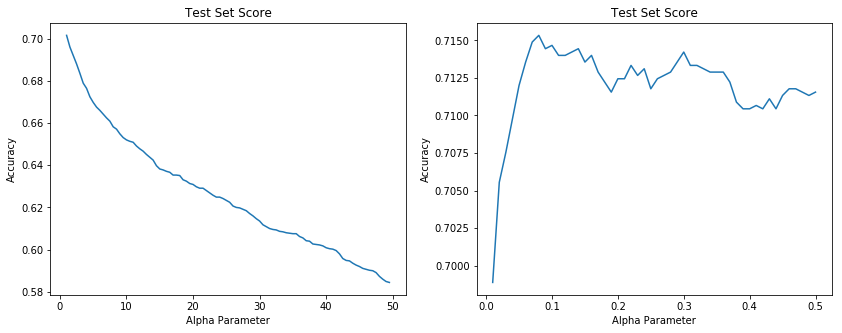

In [36]:
# Tuning alpha value
param_tune1 = []
for i in np.arange(1, 50, .5):    
    mnb = MultinomialNB(alpha=i)
    mnb.fit(X_train, y_train)
    score = mnb.score(X_test, y_test)
    param_tune1.append([i, score])

param_tune1 = pd.DataFrame(param_tune1)
param_tune1.columns = ['parameter', 'score']

# Zooming in from 0 to 0.5
param_tune2 = []
for i in np.linspace(.01, .5):    
    mnb = MultinomialNB(alpha=i)
    mnb.fit(X_train, y_train)
    score = mnb.score(X_test, y_test)
    param_tune2.append([i, score])

param_tune2 = pd.DataFrame(param_tune2)
param_tune2.columns = ['parameter', 'score']

plt.figure(figsize=(14,5))

plt.subplot(1, 2, 1)
plt.plot(param_tune1.parameter, param_tune1.score)
plt.title('Test Set Score')
plt.xlabel('Alpha Parameter')
plt.ylabel('Accuracy')

plt.subplot(1, 2, 2)
plt.plot(param_tune2.parameter, param_tune2.score)
plt.title('Test Set Score')
plt.xlabel('Alpha Parameter')
plt.ylabel('Accuracy')

plt.show()

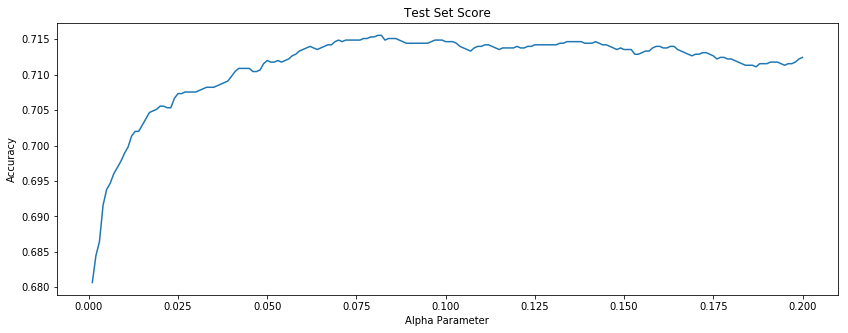

In [37]:
# Zooming in further from 0 to 0.2
param_tune3 = []
for i in np.linspace(.001, .2, 200):    
    mnb = MultinomialNB(alpha=i)
    mnb.fit(X_train, y_train)
    score = mnb.score(X_test, y_test)
    param_tune3.append([i, score])

param_tune3 = pd.DataFrame(param_tune3)
param_tune3.columns = ['parameter', 'score']

plt.figure(figsize=(14,5))

plt.plot(param_tune3.parameter, param_tune3.score)
plt.title('Test Set Score')
plt.xlabel('Alpha Parameter')
plt.ylabel('Accuracy')

plt.show()

In [39]:
# Finding maximum score
print(param_tune3[75:85])
print('\nMaximum Score')
print(np.max(param_tune3.score))

    parameter     score
75      0.076  0.714889
76      0.077  0.715111
77      0.078  0.715111
78      0.079  0.715333
79      0.080  0.715333
80      0.081  0.715556
81      0.082  0.715556
82      0.083  0.714889
83      0.084  0.715111
84      0.085  0.715111

Maximum Score
0.7155555555555555


In [59]:
mnb = MultinomialNB(alpha=.08)
mnb.fit(X_train, y_train)

print('\n--Refined Naive Bayes Model--')
print('Training set score:', mnb.score(X_train, y_train))
print('Test set score:', mnb.score(X_test, y_test))


--Refined Naive Bayes Model--
Training set score: 0.904
Test set score: 0.7153333333333334


# Conclusion
Clustering did not seem to be very helpful in classifying sentences by author.  Clusters generally had sentences from various authors grouped together.

Several models using TF-IDF vectors performed well. The best performers were Naive Bayes, Linear Regression, and the Multi-layer Perceptron Classifier.  These three models showed accuracy around 70% on the test set.  Some of the other models seemed to overfit, as they displayed high accuracy on the training set, but did not perform nearly as well on the test set.

The best perfoming model, using Naive Bayes algorithm, showed 71.53% accuracy on the test set.  This is well below the 90.4% accuracy on the training set, but is still decent considering the similarity between the texts used.